In [1]:
import tensorflow as tf
import cv2
import os
import random
import numpy as np
import glob

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

random.seed(23)

In [2]:
## resizing images 
def img_resize(image, y_dim, x_dim):
    resized_img = cv2.resize(image, (y_dim,x_dim))
    return resized_img

In [3]:
image_path = r"D:\Ganesh\archive (1)\Forest Segmented\Forest Segmented\images\*.jpg"
mask_path = r"D:\Ganesh\archive (1)\Forest Segmented\Forest Segmented\masks\*.jpg"

In [4]:
image_names = sorted(glob.glob(image_path), key=lambda x: x.split('.')[0])
mask_names = sorted(glob.glob(mask_path), key=lambda x: x.split('.')[0])

In [5]:
image_names

['D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\10452_sat_08.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\10452_sat_18.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_00.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_01.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_02.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_03.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_04.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_07.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_08.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_10.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\images\\111335_sat_12.jpg',
 

In [6]:
mask_names 
#The sorting is highly necessary.
#It is not necessary that the images that we load will get loaded in given order only.
#So, we need to sort in a way that our original image is mapped against its correct mask.
#This can be done by sorted() method of the python glob module. 
#The sorted() function takes the key using which it sorts. I have used the text before '.jpg' in order to sort the images here.

['D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\10452_mask_08.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\10452_mask_18.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_00.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_01.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_02.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_03.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_04.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_07.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_08.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_10.jpg',
 'D:\\Ganesh\\archive (1)\\Forest Segmented\\Forest Segmented\\masks\\111335_mask_12.jpg',
 

In [7]:
image_array = []

for image in image_names:
    img = cv2.imread(image, -1)
    img = img_resize(img, 128, 128)
    image_array.append(img)
    
image_array = np.array(image_array)

In [8]:
mask_array = []

for mask in mask_names:
    msk = cv2.imread(mask, 0)
    msk = img_resize(msk, 128, 128)
    mask_array.append(msk)
    
mask_array = np.array(mask_array)

In [9]:
num = random.randint(0,100)
print(f"Random image array element: {image_array[num]}\n")
print(f"Image shape: {image_array[num].shape}\n")

print(f"Random mask array element: {mask_array[num]}\n")
print(f"Mask shape: {mask_array[num].shape}\n")

print(f"Image array length: {len(image_array)}\n")
print(f"Mask array length: {len(mask_array)}\n")

Random image array element: [[[141 171 186]
  [110 141 158]
  [113 140 155]
  ...
  [ 62  84  89]
  [ 63  84  86]
  [ 65  83  84]]

 [[155 186 200]
  [108 141 157]
  [105 133 146]
  ...
  [ 64  86  91]
  [ 64  84  87]
  [ 62  79  81]]

 [[139 169 180]
  [111 143 157]
  [100 128 140]
  ...
  [ 66  85  91]
  [ 72  91  95]
  [ 45  62  65]]

 ...

 [[ 53  80  77]
  [ 68  94  88]
  [ 84 110  98]
  ...
  [ 59  77  64]
  [ 47  67  53]
  [ 61  80  64]]

 [[ 41  65  70]
  [ 69  92  91]
  [ 72  95  90]
  ...
  [ 48  69  54]
  [ 55  77  60]
  [ 61  83  63]]

 [[ 31  54  63]
  [ 57  77  81]
  [ 68  89  87]
  ...
  [ 61  83  67]
  [ 55  77  58]
  [ 64  88  65]]]

Image shape: (128, 128, 3)

Random mask array element: [[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

Mask shape: (128, 128)

Image array length: 5108

Mask array length: 5108



In [10]:
def normalize_array(arr):
    return arr/255.0

X = normalize_array(image_array)
y = normalize_array(mask_array)

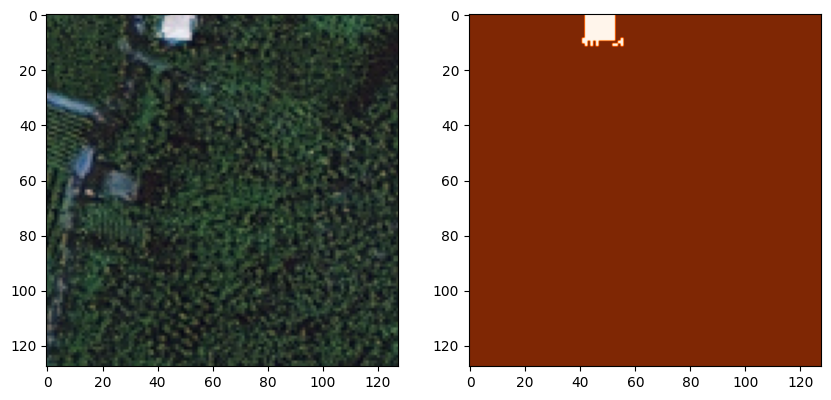

In [11]:
"""
random_number = random.randint(0,500)

fig, ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(X[random_number])
ax[1].imshow(y[random_number])
"""
random_number = random.randint(0,500)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(X[random_number])


cmap = plt.get_cmap('Oranges_r')  
masked_region = (y[random_number] != 1).astype(float)  
ax[1].imshow(masked_region, cmap=cmap)

plt.show()


In [12]:
## splitting the image into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=23)

In [13]:
## creating a unet model using tensorflow.keras layers

def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(inputs)
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(conv)
    
    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
         
    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2,2))(conv)
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [19]:
early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("D:\Ganesh\archive (1)\Forest Segmented\Forest Segmented\forest_image_segmentor_model.h5",save_best_only=True)

In [20]:
num_epochs = 1

history = model.fit(X_train,y_train,epochs=num_epochs,callbacks=[early_stopping_cb], validation_data=(X_test, y_test))



144/144 [==============================] - 532s 4s/step - loss: 0.6026 - accuracy: 0.6771 - val_loss: 0.5598 - val_accuracy: 0.7333


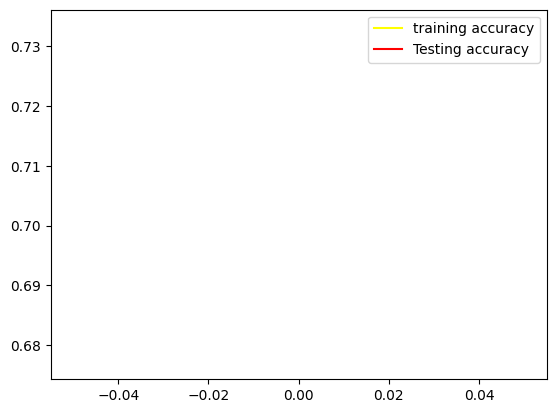

In [21]:
## creating an accuracy graph for training and testing data
plt.plot(history.history['accuracy'],color='yellow',label='training accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='Testing accuracy')
plt.legend()
plt.show()


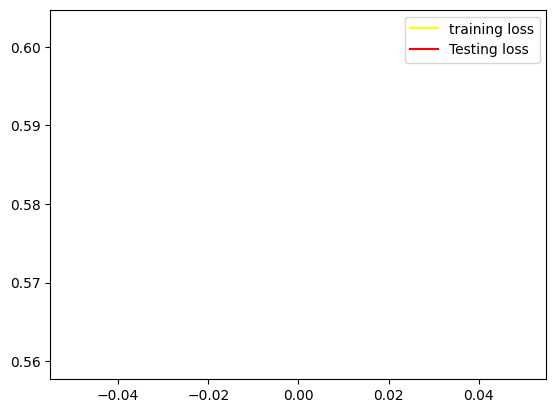

In [22]:
# creating an loss graph for training and testing data
plt.plot(history.history['loss'],color='yellow',label='training loss')
plt.plot(history.history['val_loss'],color='red',label='Testing loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 104ms/step


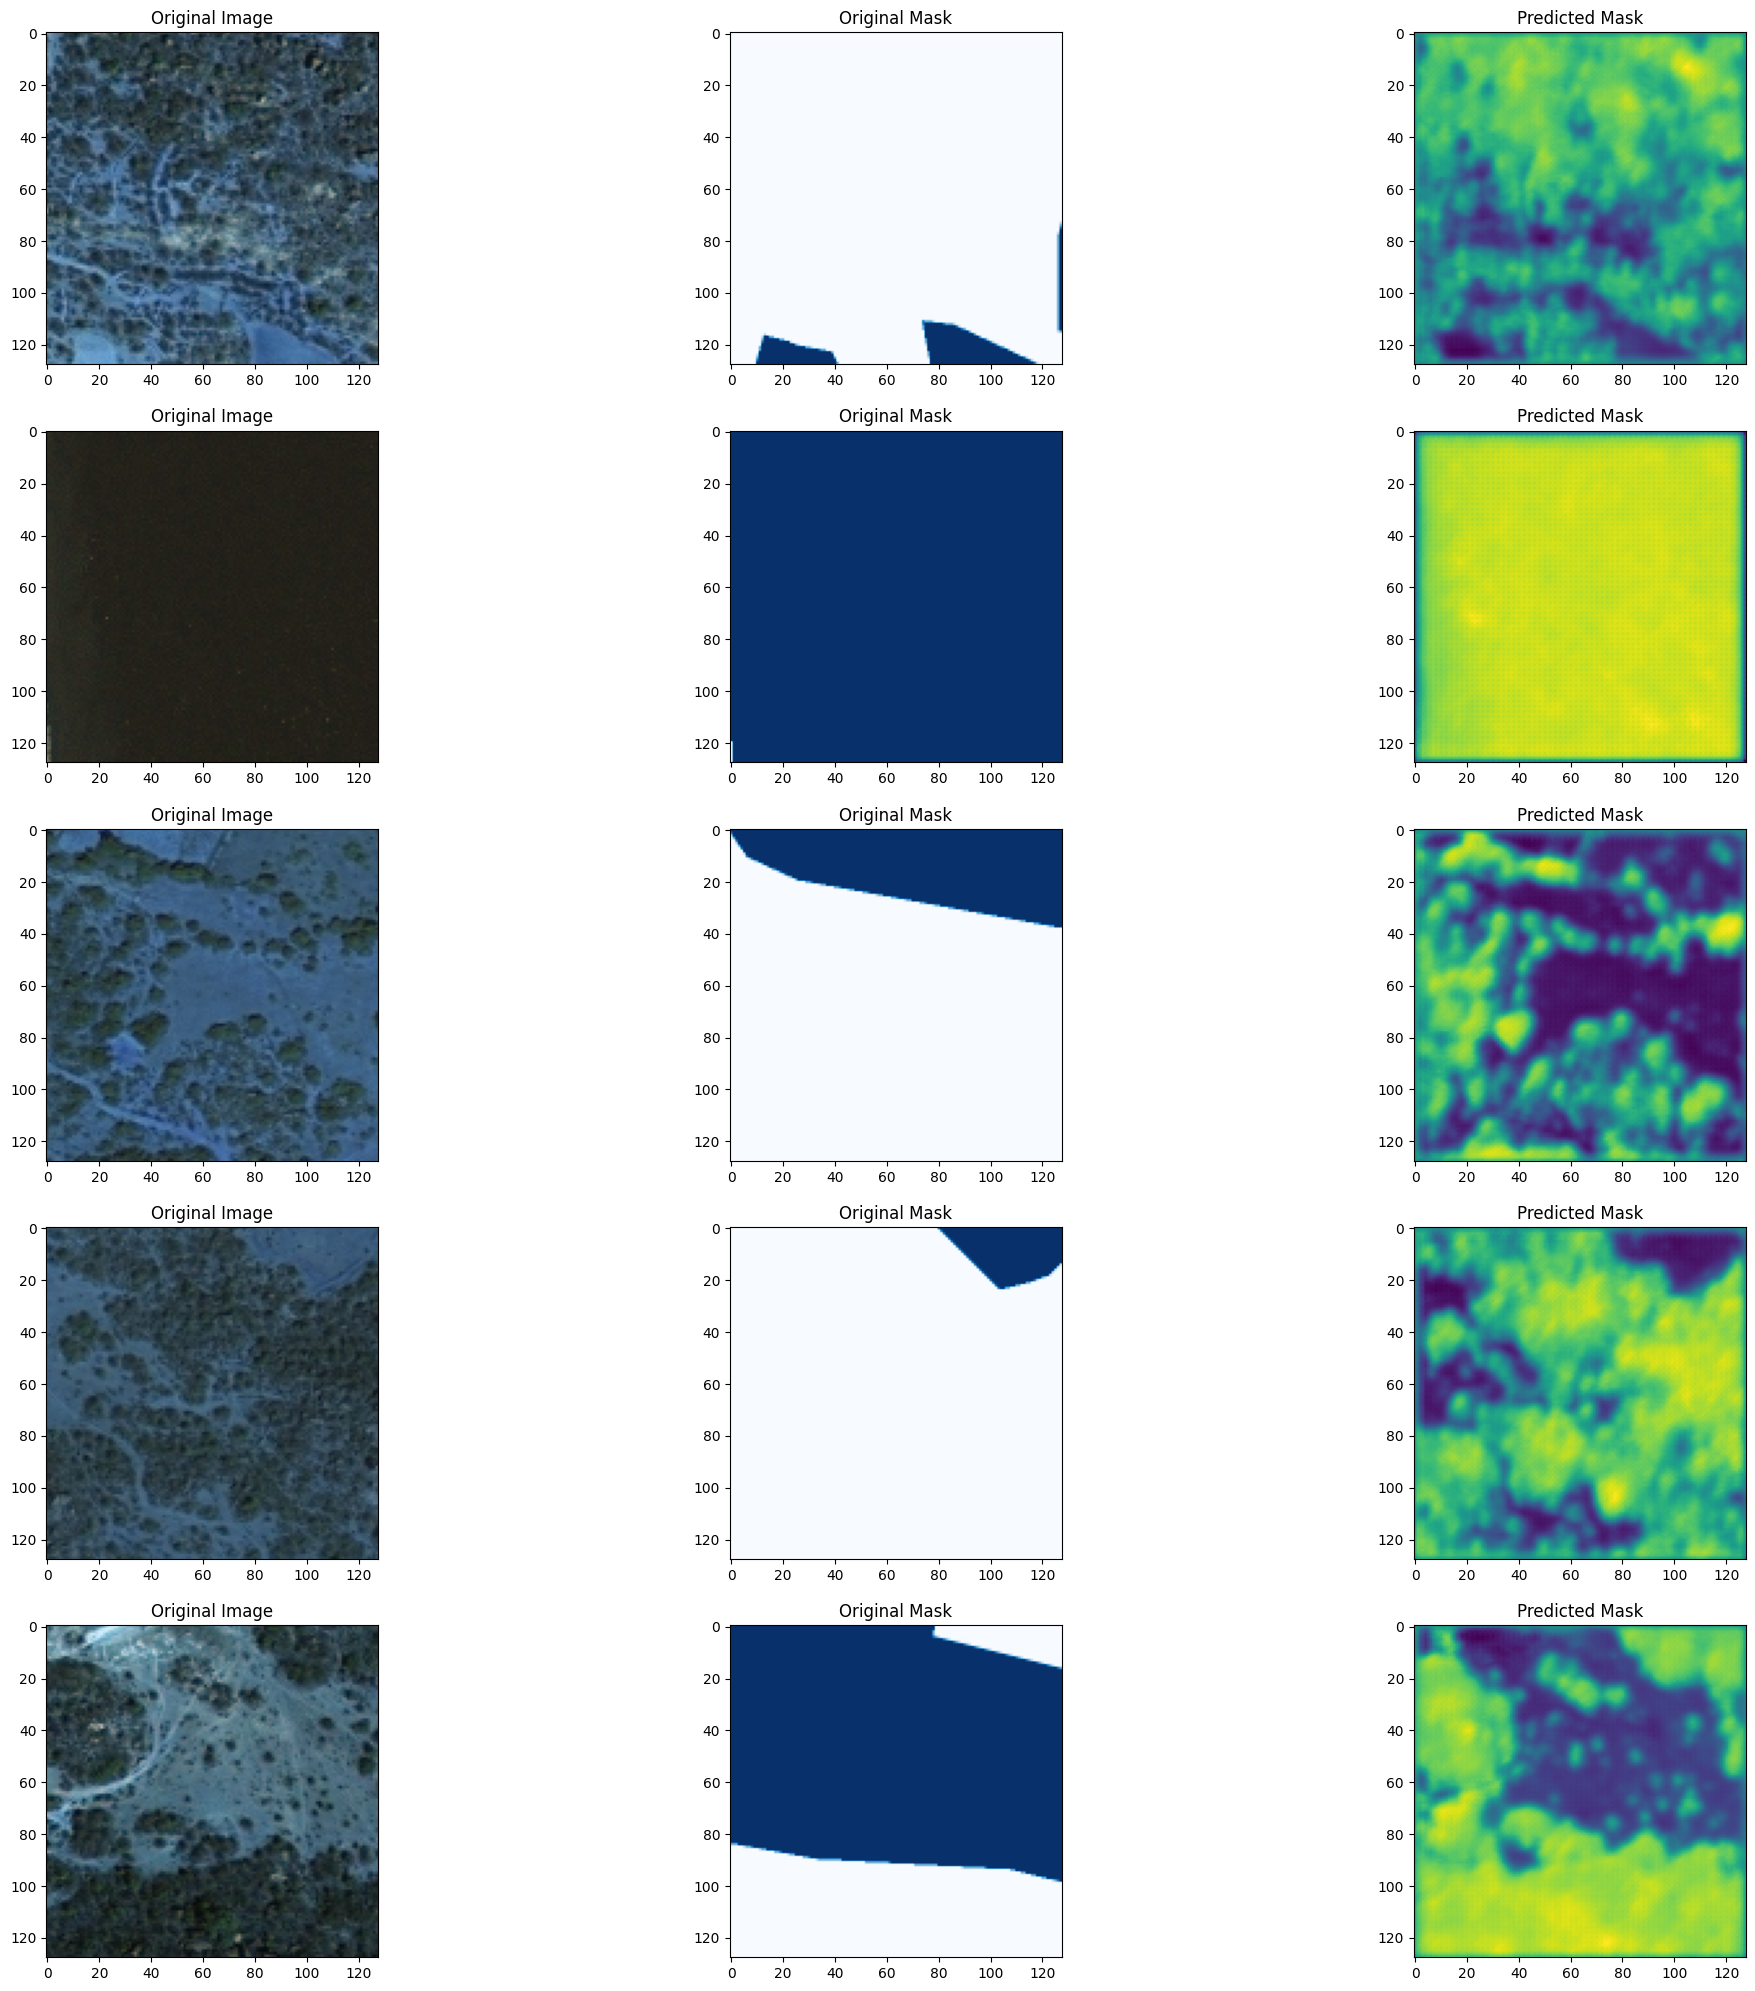

In [23]:
figure, axes = plt.subplots(5,3, figsize=(25,25))

for i in range(0,5):
    rand_num = random.randint(0,400)
    original_img = X_test[rand_num]
    axes[i,0].imshow(original_img)
    axes[i,0].title.set_text('Original Image')
    
    original_mask = y_test[rand_num]
    axes[i,1].imshow(original_mask,cmap='Blues_r')
    axes[i,1].title.set_text('Original Mask')
    
    original_img = np.expand_dims(original_img, axis=0)
    predicted_mask = model.predict(original_img).reshape(128,128)
    axes[i,2].imshow(predicted_mask)
    axes[i,2].title.set_text('Predicted Mask')